# Zadanie 1

Resolution: (600, 900, 3)


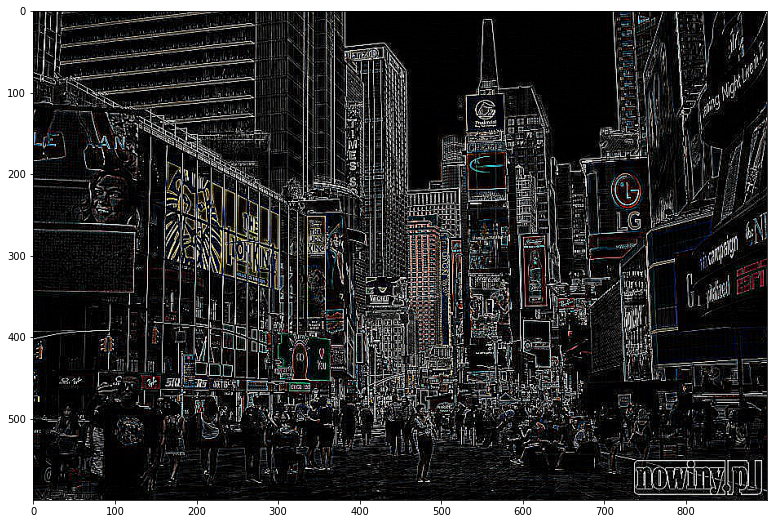

In [1]:
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9)
image = cv.imread("images/miasto.jpg")
print('Resolution:', image.shape)
kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
]
kernel = np.asarray(kernel)
filtered_image = cv.filter2D(image, -1, kernel=kernel)
plt.imshow(cv.cvtColor(filtered_image, cv.COLOR_BGR2RGB))

# Zadanie 2

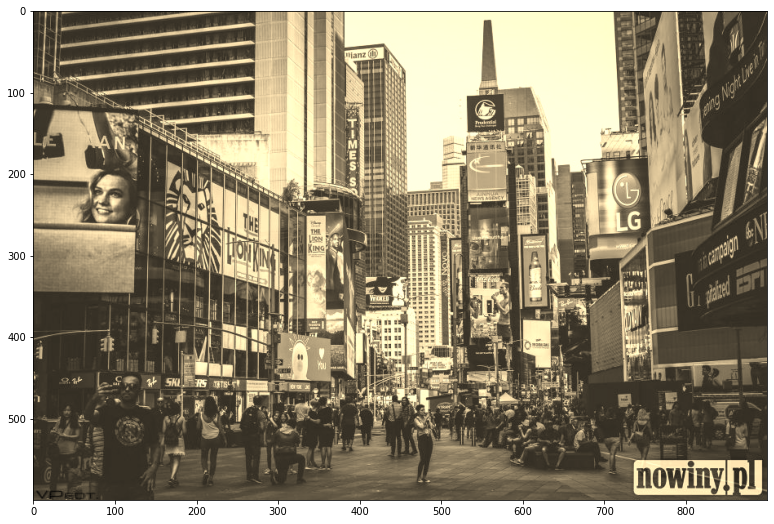

In [2]:
matrix = [
    [0.393, 0.769, 0.189],
    [0.349, 0.689, 0.168],
    [0.272, 0.534, 0.131]
]
image2 = cv.cvtColor(np.array(image, dtype='float32')/255, cv.COLOR_BGR2RGB)
# F dla tych którzy nie wiedzieli o transform()
image2 = cv.transform(image2, np.matrix(matrix))
image2[np.where(image2 > 1.0)] = 1.0

plt.imshow(image2)

# Zadanie 3

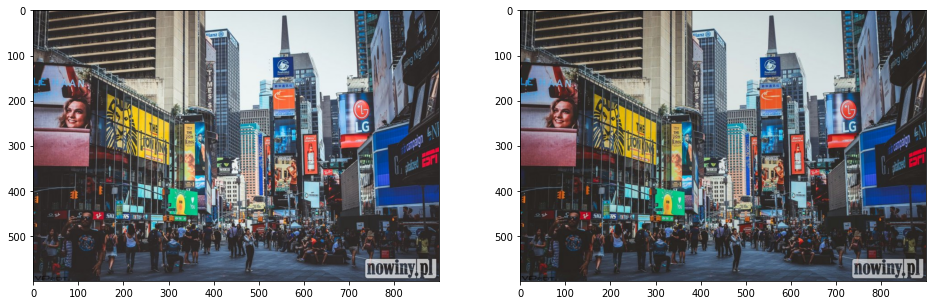

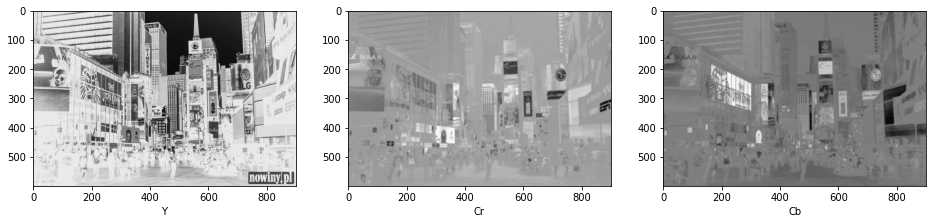

In [3]:
matrix = [
    [0.229, 0.587, 0.114],
    [0.500, -0.418, -0.082],
    [-0.168, -0.331, 0.500]
]
fig, ax = plt.subplots(1, 2)
imageYCrCb = cv.cvtColor(np.array(image, dtype='float32'), cv.COLOR_BGR2RGB)
imageYCrCb = cv.transform(imageYCrCb, np.matrix(matrix))
imageYCrCb[:,:,1] += 128.0
imageYCrCb[:,:,2] += 128.0
imageYCrCb[np.where(imageYCrCb > 255.0)] = 255.0
imageYCrCb[np.where(imageYCrCb < 0.0)] = 0.0
imageYCrCb = imageYCrCb.astype('uint8')

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(imageYCrCb, cv.COLOR_YCrCb2RGB))
fig, ax = plt.subplots(1, 3)
ax[0].set_xlabel('Y')
ax[0].imshow(imageYCrCb[:,:,0], cmap="Greys")
ax[1].set_xlabel('Cr')
ax[1].imshow(imageYCrCb[:,:,1], cmap="Greys")
ax[2].set_xlabel('Cb')
ax[2].imshow(imageYCrCb[:,:,2], cmap="Greys")

# Zadanie 4

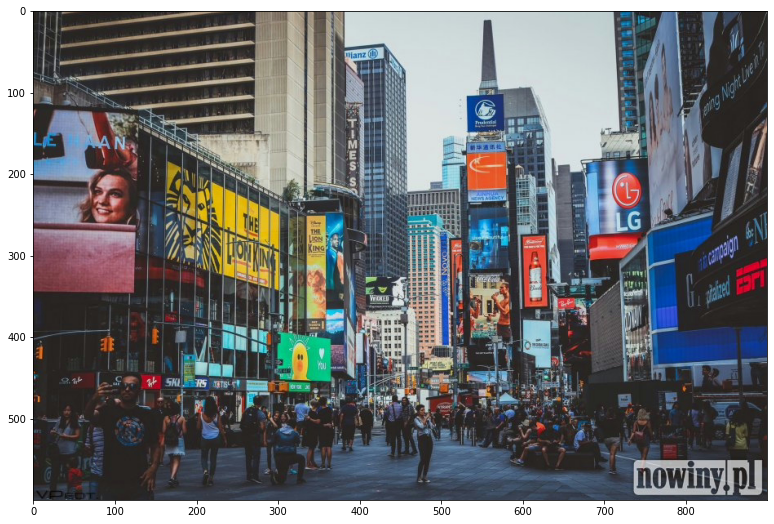

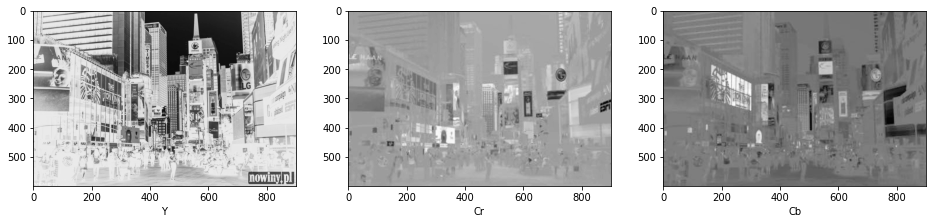

In [4]:
scale = 4   # "stopień" downsamplingu - liczba stosowna do wymiarów obrazu
scale_helper = {4:(2,2), 8:[2,4], 9:[3,3], 16:[4,4], 32:[4,8],
                64:[8,8], 100:[10,10], 900:[30,30], 10000:[100,100]} # co który pixel h,w
height, width = scale_helper[scale]

cr_cb = np.zeros([image.shape[0]//height, image.shape[1]//width, 2]).astype('uint8')
cr_cb[:,:,:] = imageYCrCb[::height, ::width, 1:]
up_data = np.zeros([image.shape[0], image.shape[1],3]).astype('uint8')
for y in range(height):
    for x in range(width):
        up_data[y::height, x::width, 1:] = cr_cb[:,:,:]
up_data[:,:,0] = imageYCrCb[:,:,0]

plt.imshow(cv.cvtColor(up_data, cv.COLOR_YCrCb2RGB))
fig, ax = plt.subplots(1,3)
ax[0].set_xlabel('Y')
ax[0].imshow(up_data[:,:,0], cmap="Greys")
ax[1].set_xlabel('Cr')
ax[1].imshow(up_data[:,:,1], cmap="Greys")
ax[2].set_xlabel('Cb')
ax[2].imshow(up_data[:,:,2], cmap="Greys")

# Zadanie 5

In [5]:
def MSE(image_in, image_out):
    result = np.sum((image_in.astype(float) - image_out.astype(float))**2)
    return result / (image.shape[0] * image.shape[1] * image.shape[2])

print(MSE(cv.cvtColor(image, cv.COLOR_BGR2RGB), cv.cvtColor(up_data, cv.COLOR_YCrCb2RGB)))            

95.01851358024692
